Spatial Resolution: Down-sampling and Up-sampling

In [1]:
# Import cv2, matplotlib, numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Read the original image and know its type
img1= cv2.imread('cameraman.png',0)
#type(img1)

In [3]:
# Obtain the size of the original image
[m,n]=img1.shape
#print(m,n)

In [4]:
# Ask sampling rate for down sampling from the user
f= int(input("Enter the down sampling rate: " ))

Enter the down sampling rate: 2


In [5]:
#Create a blank image 
img2= np.zeros((m//f,n//f), dtype=np.int)

#Enter the pixel values in the blank image by down sampling
for i in range (0,m,f):
    for j in range (0,n,f):
        try:
            
            img2[i//f][j//f]= img1[i][j] 
        except IndexError:
            pass
        

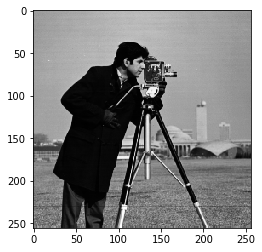

In [12]:
# Using list comprehension
img7= [img1[i,j] for i in range(0,m) for j in range(0,n)]

img7= np.reshape(img7, (m,n))
plt.imshow(img7, cmap="gray")


In [6]:
img2.shape

(128, 128)

In [27]:
cv2.imwrite('sampled_img.png',img2)

True

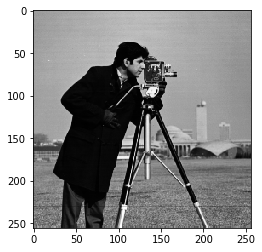

In [28]:
#Show original image
plt.imshow(img1, cmap='gray')

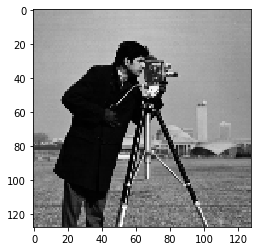

In [29]:
#Show down sampled image
plt.imshow(img2,cmap='gray')

In [30]:
# Up sampling
img3= cv2.imread("sampled_img.png",0)
[m1,n1]= img3.shape
print(m1,n1)

128 128


In [31]:

img3= np.zeros((m , n), dtype= np.int)
#new size
for i in range(0, m-1, f):
    for j in range(0, n-1, f):
        img3[i,j]= img2[i//f][j//f] 

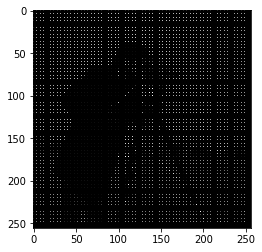

In [18]:
plt.imshow(img3, cmap="gray")

In [32]:
# Nearest neighbour interpolation-Replication
#Replicating rows
for i in range(1,m-1,f):
    for j in range(0,n-1):
        img3[i,j]= img3[i-1,j]

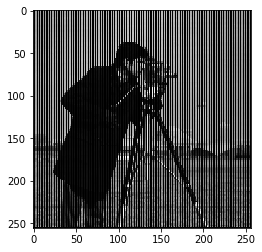

In [33]:
plt.imshow(img3, cmap="gray")

In [34]:
#Replicating columns
for i in range(0,m-1):
    for j in range(1,n-1,f):
        img3[i,j]= img3[i,j-1]

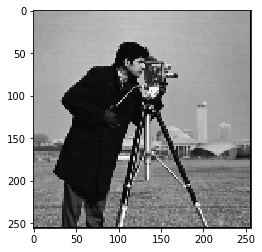

In [35]:
plt.imshow(img3, cmap="gray")

In [36]:

img4= np.zeros((m , n), dtype= np.int)
#new size
for i in range(0, m-1, f):
    for j in range(0, n-1, f):
        img4[i,j]= img2[i//f][j//f] 

        

In [37]:
# Averaging neighbouring row pixels to get current pixel value
for i in range(1, m-1,f):
    for j in range(0, n-1):
        img4[i,j]= (img4[i-1,j]+img4[i+1,j])/2

In [38]:
# Averaging neighbouring column pixels to get current pixel value
for i in range(0, m-1):
    for j in range(1, n-1,f):
        img4[i,j]= (img4[i,j-1]+img4[i,j+1])/2

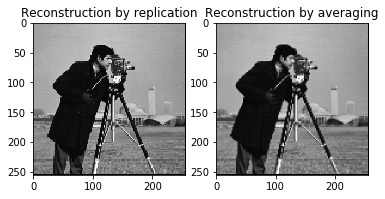

In [42]:
plt.subplot(1,2,2)
plt.title('Reconstruction by averaging')
plt.imshow(img4,cmap="gray")
plt.subplot(1,2,1)
plt.title('Reconstruction by replication')
plt.imshow(img3,cmap='gray')

Conclusion